In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_CW = pd.read_csv('Data/CW_HistoricalEmissions_ClimateWatch.csv')
df_GCP = pd.read_csv('Data/CW_HistoricalEmissions_GCP.csv')
df_PIK = pd.read_csv('Data/CW_HistoricalEmissions_PIK.csv')
df_UNFC = pd.read_csv('Data/CW_HistoricalEmissions_UNFCCC.csv')
df_US = pd.read_csv('Data/CW_HistoricalEmissions_US.csv')

# Data Overview

Source: https://www.climatewatchdata.org/data-explorer/historical-emissions

Abbreviation/Source Organization's Details:
- CW: Climate Watch Historical GHG Emissions
- GCP: Global Carbon Project
- PIK: Postdam Institute For Climate Impact Research
- UNFCCC: United Nations Framework Convention on Climate Change
- US: World Resources Institute

In [3]:
display(df_CW.head(), df_CW.shape)
df_CW.columns

,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AFG,Climate Watch,Total excluding LUCF,All GHG,11.968960,12.198490,11.416530,11.498150,11.535340,11.969910,...,27.115900,29.413060,28.800070,27.015200,26.764020,27.086070,26.894000,26.526930,27.689580,28.636500
1,AFG,Climate Watch,Total including LUCF,All GHG,9.580450,9.809976,9.028016,9.109638,9.146831,9.581401,...,27.237800,29.166840,28.553850,26.768980,26.517800,26.839850,27.048660,26.681590,27.844240,28.791160
2,AFG,Climate Watch,Energy,All GHG,2.614785,2.430223,1.544761,1.457698,1.366936,1.277973,...,8.265836,10.289940,9.627950,7.730256,6.831263,8.087269,7.421360,6.944151,8.228242,8.267433
3,AFG,Climate Watch,Industrial Processes,All GHG,0.052709,0.055380,0.058051,0.061942,0.064613,0.067284,...,0.249415,0.314576,0.394037,0.465779,0.523990,0.601661,0.789337,0.910724,1.075560,1.209746
4,AFG,Climate Watch,Agriculture,All GHG,8.072853,8.396465,8.409491,8.486480,8.523959,8.957016,...,15.788380,15.902260,15.777790,15.724860,16.220450,15.114810,15.317920,15.223620,14.854280,15.544770


(10903, 34)

Index(['Country', 'Source', 'Sector', 'Gas', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [4]:
display(df_GCP.head(), df_GCP.shape)
df_GCP.columns

,Country name,Country,Sector,Source,Gas,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Cement,GCP,CO2,0.018012,0.021806,0.029074,0.05088,0.061783,...,0.02893,0.03555,0.028644,0.041189,0.076126,0.044785,0.05688,0.038329,0.060674,0.012259
1,Afghanistan,AFG,Coal,GCP,CO2,0.127120,0.175870,0.296780,0.26381,0.300450,...,3.12540,3.32690,3.705800,2.843300,2.878700,3.447800,3.84720,3.954800,4.150100,4.203500
2,Afghanistan,AFG,Gas,GCP,CO2,NaN,NaN,NaN,NaN,NaN,...,0.30778,0.29678,0.271240,0.282130,0.318640,0.300450,0.29312,0.245570,0.251240,0.238850
3,Afghanistan,AFG,Gas flaring,GCP,CO2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Oil,GCP,CO2,0.268760,0.293120,0.362740,0.39205,0.476320,...,6.57320,5.59130,5.164600,6.624500,5.794100,6.074900,6.62080,6.843000,7.219800,7.419600


(935, 67)

Index(['Country name', 'Country', 'Sector', 'Source', 'Gas', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [5]:
display(df_PIK.head(), df_PIK.shape)
df_PIK.columns

,country,sector,gas,Source,1850,1851,1852,1853,1854,1855,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,Agriculture,CH4,PIK,0.000050,0.000051,0.000052,0.000053,0.000054,0.000055,...,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280
1,ABW,Agriculture,KYOTOGHG,PIK,0.000054,0.000055,0.000057,0.000058,0.000059,0.000060,...,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160
2,ABW,Agriculture,N2O,PIK,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882
3,ABW,Energy,CH4,PIK,0.000199,0.000196,0.000195,0.000197,0.000199,0.000201,...,0.004775,0.014075,0.011150,0.008200,0.005225,0.002230,0.001483,0.001497,0.001478,0.001458
4,ABW,Energy,CO2,PIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.350000,0.862000,0.873000,0.899000,0.884000,0.933000,0.961000,0.993000,0.874000,0.980000


(4756, 176)

Index(['country', 'sector', 'gas', 'Source', '1850', '1851', '1852', '1853',
       '1854', '1855',
       ...
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object', length=176)

In [6]:
display(df_UNFC.head(), df_UNFC.shape)
df_UNFC.columns

,country,source,sector,gas,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ANNEXI,UNFCCC_AI,Agriculture,Aggregate GHGs,1704.788001,1648.445387,1606.013884,1601.057443,1552.592246,1534.835798,...,1411.344757,1400.278553,1456.357168,1471.542463,1475.642275,1473.786987,1485.896266,1500.086386,1500.814442,1476.407205
1,ANNEXI,UNFCCC_AI,Agriculture,CH4,863.697054,849.167408,834.769139,823.673298,817.513276,805.542272,...,703.307543,708.258286,706.442061,706.736879,712.165491,717.750980,726.261640,730.295841,724.134245,722.836839
2,ANNEXI,UNFCCC_AI,Agriculture,CO2,41.443983,36.442904,33.084013,29.780829,26.840862,26.768078,...,27.213644,30.212195,28.722091,29.364094,29.229262,29.642398,29.842849,29.116037,28.905011,29.948577
3,ANNEXI,UNFCCC_AI,Agriculture,N2O,799.646963,762.835076,738.160731,747.603315,708.238108,702.525448,...,680.823570,661.808072,721.193016,735.441490,734.247522,726.393609,729.791777,740.674507,747.775185,723.621788
4,ANNEXI,UNFCCC_AI,Energy,Aggregate GHGs,15168.882747,14908.041102,14427.430302,14275.728805,14062.533168,14118.617356,...,14071.990239,13878.879040,13839.810604,13608.596430,13435.672544,13287.658522,13295.029598,13404.235074,13055.489140,11942.405628


(4993, 35)

Index(['country', 'source', 'sector', 'gas', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [7]:
print(df_CW['Gas'].unique())
print(df_GCP['Gas'].unique())
print(df_PIK['gas'].unique())
print(df_UNFC['gas'].unique())

['All GHG' 'CO2' 'CH4' 'N2O' 'F-Gas']
['CO2']
['CH4' 'KYOTOGHG' 'N2O' 'CO2' 'F-Gas']
['Aggregate GHGs' 'CH4' 'CO2' 'N2O' 'Aggregate F-gases']


In [8]:
df_CW_ID = df_CW[df_CW['Country']=='IND']
df_CW_ID.head()

,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4425,IND,Climate Watch,Total excluding LUCF,All GHG,1219.55400,1273.25200,1298.27900,1331.21800,1375.47500,1440.60800,...,2533.9930,2645.6270,2795.864,2863.8360,3044.9600,3064.5430,3106.3430,3242.1720,3388.9150,3394.8720
4426,IND,Climate Watch,Total including LUCF,All GHG,1002.55600,1056.25400,1081.28100,1114.22000,1158.48100,1223.65400,...,2546.7930,2584.7470,2740.398,2804.3400,2984.5170,3003.0680,3076.4790,3215.0730,3360.5610,3363.5950
4427,IND,Climate Watch,Energy,All GHG,602.04540,645.15470,661.96830,685.70040,718.91210,770.77090,...,1668.1320,1762.1370,1907.683,1963.5380,2133.1510,2144.3240,2177.1750,2305.0820,2421.7090,2422.2380
4428,IND,Climate Watch,Industrial Processes,All GHG,26.44543,28.99591,30.05639,31.89687,34.28735,37.39374,...,100.0816,106.2293,115.987,124.4546,133.3223,135.8900,143.3061,142.6221,162.2382,168.5543
4429,IND,Climate Watch,Agriculture,All GHG,566.52730,573.90940,580.40590,587.11590,595.11500,599.53900,...,691.4386,701.8102,695.634,698.1737,699.7076,704.4405,704.8816,712.3949,721.8024,719.8204


In [9]:
df_GCP_ID = df_GCP[df_GCP['Country name']=='Indonesia']
df_GCP_ID.head()
# Null Value on Gas flaring 1960-1969

,Country name,Country,Sector,Source,Gas,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
372,Indonesia,IDN,Cement,GCP,CO2,0.19258,0.22169,0.25077,0.16354,0.21806,...,23.2940,24.7750,25.5337,24.5579,28.7098,28.9657,30.8320,30.1560,28.2035,28.6374
373,Indonesia,IDN,Coal,GCP,CO2,1.82070,1.52790,1.30070,1.59380,1.20550,...,187.1713,164.2192,173.5843,197.8152,206.3279,221.0933,262.2221,315.4007,300.5179,303.1536
374,Indonesia,IDN,Gas,GCP,CO2,4.66710,4.92810,5.19190,5.37140,5.24320,...,80.0621,64.7533,62.4157,94.2527,91.1860,84.3385,84.1479,87.9104,74.9609,74.0879
375,Indonesia,IDN,Gas flaring,GCP,CO2,NaN,NaN,NaN,NaN,NaN,...,6.6493,5.8993,5.7635,5.4607,5.0892,4.3870,3.9464,3.7837,3.5250,3.1493
376,Indonesia,IDN,Oil,GCP,CO2,14.70480,19.32390,16.23150,15.63430,15.70760,...,218.7774,229.4083,220.5928,217.0627,221.3386,228.4703,222.5087,222.1850,202.5790,210.2494


In [10]:
df_PIK_ID = df_PIK[df_PIK['country']=='IND']
df_PIK_ID.head()

,country,sector,gas,Source,1850,1851,1852,1853,1854,1855,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1950,IND,Agriculture,CH4,PIK,144.7500,145.250,146.0000,146.5000,147.0000,147.500,...,362.500,362.500,362.50,360.000,360.000,365.000,367.500,367.500,365.000,365.000
1951,IND,Agriculture,CO2,PIK,0.0000,0.000,0.0000,0.0000,0.0000,0.000,...,12.300,12.600,12.60,12.600,12.300,12.300,12.400,13.400,13.700,13.900
1952,IND,Agriculture,KYOTOGHG,PIK,151.0000,152.000,152.0000,153.0000,154.0000,154.000,...,462.000,466.000,468.00,472.000,474.000,478.000,484.000,484.000,488.000,491.000
1953,IND,Agriculture,N2O,PIK,6.1388,6.258,6.3772,6.4964,6.6156,6.705,...,87.612,90.592,93.87,98.638,101.022,102.214,104.598,103.704,110.558,113.538
1954,IND,Energy,CH4,PIK,15.0750,15.175,15.2500,15.3500,15.4250,15.525,...,62.000,49.500,50.25,51.000,51.750,52.250,49.750,49.000,48.000,47.500


In [11]:
df_UNFC_ID = df_UNFC[df_UNFC['country']=='IDN']
df_UNFC_ID.head(11)
# Null Value in 1995-2020

,country,source,sector,gas,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2867,IDN,UNFCCC_NAI,Agriculture,Aggregate GHGs,75.10112,83.58546,84.85189,84.85237,84.50724,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2868,IDN,UNFCCC_NAI,Agriculture,CH4,58.66182,67.24536,67.56939,67.88607,68.12064,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2869,IDN,UNFCCC_NAI,Agriculture,N2O,16.43930,16.34010,17.28250,16.96630,16.38660,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2870,IDN,UNFCCC_NAI,Energy,Aggregate GHGs,169.61637,186.37305,198.27983,208.14643,222.09984,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,IDN,UNFCCC_NAI,Energy,CH4,39.64338,44.33205,46.66788,48.09168,50.31033,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2872,IDN,UNFCCC_NAI,Energy,CO2,128.39819,140.41040,149.92555,158.32185,170.01631,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2873,IDN,UNFCCC_NAI,Energy,N2O,1.57480,1.63060,1.68640,1.73290,1.77320,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2874,IDN,UNFCCC_NAI,Industrial Processes,Aggregate GHGs,14.30276,14.70213,15.58982,17.38826,19.14381,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2875,IDN,UNFCCC_NAI,Industrial Processes,CH4,0.00966,0.00903,0.00672,0.00966,0.01071,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2876,IDN,UNFCCC_NAI,Industrial Processes,CO2,14.29000,14.69000,15.58000,17.36000,19.13000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(df_CW_ID.shape, df_GCP_ID.shape, df_PIK_ID.shape, df_UNFC_ID.shape)

(57, 34) (6, 67) (25, 176) (27, 35)


## Annual Mean Temperature Indonesia

Source Data: https://climateknowledgeportal.worldbank.org/country/indonesia/climate-data-historical

In [13]:
df_DtempID = pd.read_csv('data/observed-average-annual-mean-temperature-of-indonesia-for-1901-2021.csv')

df_DtempID.head()

,Category,Annual Mean,5-yr smooth
0,1901,25.40,25.41
1,1902,25.37,25.39
2,1903,25.37,25.37
3,1904,25.36,25.35
4,1905,25.41,25.35


Text(0, 0.5, 'Temp (C)')

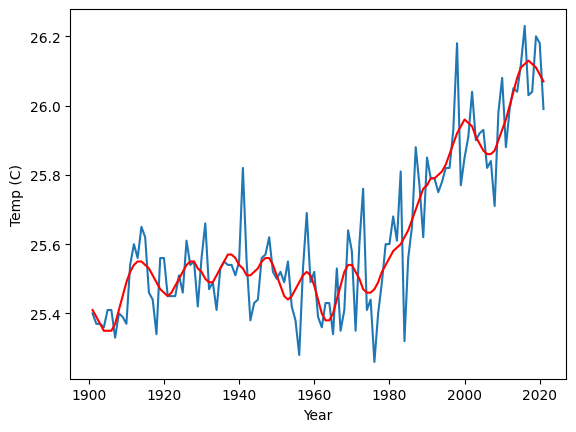

In [14]:
plt.plot(df_DtempID.Category, df_DtempID['Annual Mean'], '-')
plt.plot(df_DtempID.Category, df_DtempID['5-yr smooth'], 'r-')
plt.xlabel('Year')
plt.ylabel('Temp (C)')

array([1.08133907e-10, 1.63426922e+01, 2.33223809e-04])

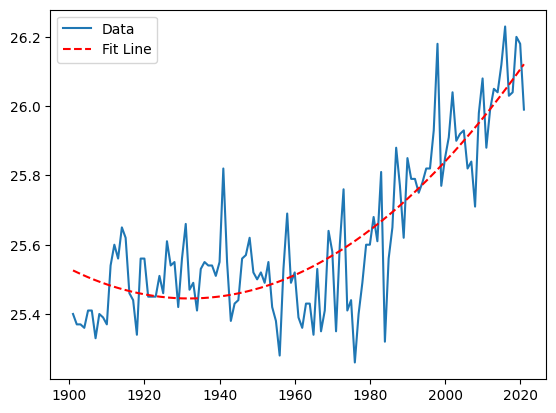

In [26]:
import numpy as np
from scipy.optimize import curve_fit

def model_f(x, a, b, c):
    return a*(x-b)**2 + c

x_data = df_DtempID.Category
y_data = df_DtempID['Annual Mean']
popt, pcov = curve_fit(model_f, x_data, y_data)

a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 250)
y_model = model_f(x_model, a_opt, b_opt, c_opt) 
 
display(np.diag(pcov))
plt.plot(x_data, y_data, '-', label='Data')
plt.plot(x_model, y_model, '--', color='r', label='Fit Line')
plt.legend()
plt.show()

## World Bank Data

Source: https://databank.worldbank.org/

In [16]:
df_DBW = pd.read_csv('Data/DataBank.csv')

display(df_DBW.head(), df_DBW.shape)
df_DBW.columns

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,19542982,19688632,21000256,22645130,23553551,24411191,25442944,25903301,26427199,27385307,28189672,29249157,30466479,31541209,32716210,33753499
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1.4438030241194,0.742516834396313,6.44932147797304,7.54101896480183,3.93317768847308,3.57650800354462,4.13967803534352,1.79319572747206,2.00233326232255,3.56128837446668,2.89490410370988,3.68950830230738,4.07762772858795,3.46678830410982,3.65757606530364,3.12134122890873
2,Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860
3,Afghanistan,AFG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,..,33.7,..,..,..,38.3,..,..,..,..
4,Afghanistan,AFG,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,..,..,..,..,..,..,..,..,..,12597267199.7931,14756849840.379,15966745776.0201,19682367367.511,21470121710.8051,21234423666.2444,20638645624.114


(10421, 20)

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]'],
      dtype='object')

In [17]:
print(df_DBW[df_DBW['Country Name'] == 'Indonesia'][['Series Name']])

                                            Series Name
4272                                  Population, total
4273                       Population growth (annual %)
4274                              Surface area (sq. km)
4275  Poverty headcount ratio at national poverty li...
4276                    GNI, Atlas method (current US$)
4277         GNI per capita, Atlas method (current US$)
4278                 GNI, PPP (current international $)
4279      GNI per capita, PPP (current international $)
4280                    Income share held by lowest 20%
4281            Life expectancy at birth, total (years)
4282           Fertility rate, total (births per woman)
4283  Adolescent fertility rate (births per 1,000 wo...
4284  Contraceptive prevalence, any method (% of mar...
4285  Births attended by skilled health staff (% of ...
4286    Mortality rate, under-5 (per 1,000 live births)
4287  Prevalence of underweight, weight for age (% o...
4288  Immunization, measles (% of children ages 

In [18]:
df_DBW[df_DBW['Country Name'] == 'Indonesia'][['Series Name']].to_csv('Indo_SeriesDetail.txt', index=False, header=False, sep='\n')

In [19]:
df_DBW_ID = df_DBW[df_DBW['Country Name']=='Indonesia']
df_DBW_ID.head()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
4272,Indonesia,IDN,"Population, total",SP.POP.TOTL,214072421,217112437,220115092,223080121,225938595,228805144,231797427,234858289,237936543,240981299,244016173,247099697,250222695,253275918,256229761,259091970
4273,Indonesia,IDN,Population growth (annual %),SP.POP.GROW,1.44708848408903,1.4100988547982,1.37351928060869,1.33804389134874,1.27322648868512,1.26074829560286,1.29930889873663,1.31184759614566,1.30217053507895,1.27153208994292,1.25151729140412,1.25573808861315,1.25594145835811,1.21281780987831,1.15950664180271,1.1108549322781
4274,Indonesia,IDN,Surface area (sq. km),AG.SRF.TOTL.K2,1910930,1910930,1910930,1910930,1910930,1910930,1910930,1910930,1910930,1910930,1910930,1910930,1910930,1910930,1910931,1913580
4275,Indonesia,IDN,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,19.1,18.4,18.2,17.4,16.7,16,17.8,16.6,15.4,14.1,13.3,12.5,12,11.4,11.3,11.2
4276,Indonesia,IDN,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,122450409459.164,154214850972.461,172499137485.743,198234185989.083,241393121387.257,276758984581.45,315565145516.751,371908892063.092,457090279931.005,512965798113.463,612253815558.797,737717018641.036,889278532542.61,939754625213.983,922995728689.024,886547499338.417


# Simulate

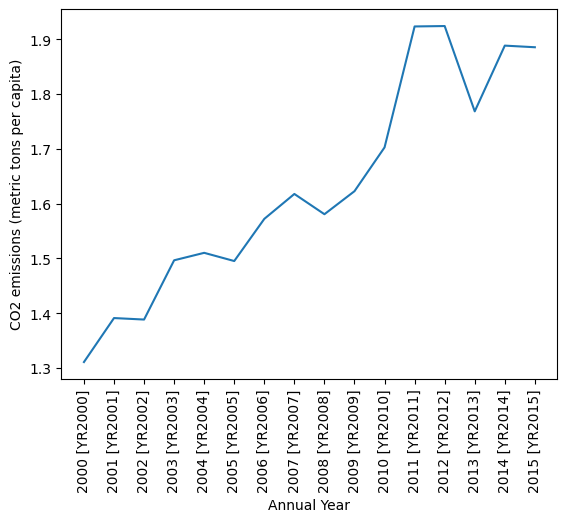

In [65]:
value_label = 'CO2 emissions (metric tons per capita)'

x_d = df_DBW_ID.columns[4:]
y_d = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == value_label][x_d]).astype(float).flatten()
plt.xticks(rotation='vertical')
plt.xlabel('Annual Year')
plt.ylabel(value_label)
plt.plot(x_d, y_d)

## Genetic Algorithm

**Formula:**

The objective function for optimizing greenhouse gas emissions using the Genetic Algorithm can be represented as:


$ \text{Objective Function}(x) = \sum_{i=1}^{n} \left( w_{\text{ghg}} \cdot \text{GHG}_{\text{data}}[i] + w_{\text{temperature}} \cdot \text{Temperature}_{\text{data}}[i] + w_{\text{population}} \cdot \text{Population}_{\text{data}}[i] \right) $

where:
- $ \text{Objective Function}(x) $ is the fitness value of the solution.
- $ x $ represents the vector of weights for GHG emissions, temperature, and population.
- $ w_{\text{ghg}} $, $ w_{\text{temperature}} $, and $ w_{\text{population}} $ are the weights for GHG emissions, temperature, and population, respectively.
- $ \text{GHG}_{\text{data}}[i] $, $ \text{Temperature}_{\text{data}}[i] $, and $ \text{Population}_{\text{data}}[i] $ are the corresponding normalized datasets for the $ i $th data point.

In this formulation, the objective function calculates the sum of the weighted values of GHG emissions, temperature, and population across all data points.

In [77]:
df_DtempID.head()

,Category,Annual Mean,5-yr smooth
0,1901,25.40,25.41
1,1902,25.37,25.39
2,1903,25.37,25.37
3,1904,25.36,25.35
4,1905,25.41,25.35


In [82]:
np.array(df_DtempID[(df_DtempID['Category'] >= 2000) & (df_DtempID['Category'] <= 2015)][['Annual Mean']]).flatten()

array([25.85, 25.91, 26.04, 25.9 , 25.92, 25.93, 25.82, 25.84, 25.71,
       25.98, 26.08, 25.88, 25.99, 26.05, 26.04, 26.12])

 The best solution found:                                                                           
 [6.90124880e-04 2.54135796e-03 9.93870513e-01]

 Objective function:
 7.987744836897361


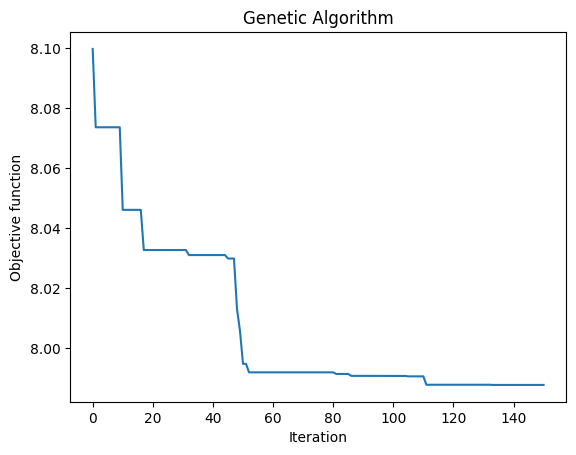

Optimized Weights:
GHG Weights: 0.0006901248798835136
Temperature Weights: 0.0025413579569351086
Population Weights: 0.9938705126953039


In [83]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from geneticalgorithm import geneticalgorithm as ga

# Load the dataset (assuming the data is stored in separate arrays)
ghg_data = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'CO2 emissions (metric tons per capita)'][x_d]).astype(float).flatten()  # Annual number of GHG emissions
temperature_data = np.array(df_DtempID[(df_DtempID['Category'] >= 2000) & (df_DtempID['Category'] <= 2015)][['Annual Mean']]).flatten()  # Annual mean temperature
population_data = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'Population, total'][x_d]).astype(float).flatten()  # Annual number of population

# Normalize the dataset
scaler = MinMaxScaler()
ghg_data_normalized = scaler.fit_transform(ghg_data.reshape(-1, 1))
temperature_data_normalized = scaler.fit_transform(temperature_data.reshape(-1, 1))
population_data_normalized = scaler.fit_transform(population_data.reshape(-1, 1))

# Define the objective function for the Genetic Algorithm
def objective_function(x):
    ghg_weights, temperature_weights, population_weights = x
    total_weights = ghg_weights + temperature_weights + population_weights
    
    # Normalize the weights
    ghg_weights /= total_weights
    temperature_weights /= total_weights
    population_weights /= total_weights
    
    # Calculate the weighted sum of normalized data
    weighted_sum = (
        ghg_weights * ghg_data_normalized +
        temperature_weights * temperature_data_normalized +
        population_weights * population_data_normalized
    )
    
    # Calculate the fitness value (e.g., minimize the sum of weighted values)
    fitness = np.sum(weighted_sum)
    
    return fitness

# Define the bounds for the variables (weights)
varbound = np.array([[0, 1]] * 3)  # Bounds for ghg_weights, temperature_weights, population_weights

# Create an instance of the Genetic Algorithm
model = ga(function=objective_function, dimension=3, variable_type='real', variable_boundaries=varbound)

# Run the optimization
model.run()

# Print the optimized weights
optimized_weights = model.best_variable
ghg_weights_optimized, temperature_weights_optimized, population_weights_optimized = optimized_weights
print("Optimized Weights:")
print("GHG Weights:", ghg_weights_optimized)
print("Temperature Weights:", temperature_weights_optimized)
print("Population Weights:", population_weights_optimized)


## Simulated Annealing Algorithm

Simulated Annealing (SA) is a metaheuristic optimization algorithm that mimics the annealing process in metallurgy. It is used to find the global minimum of a given objective function.

The SA algorithm follows these steps:

1. Initialize the temperature `T` and the initial solution `x`.
2. Repeat until the stopping criterion is met:
     - Generate a new candidate solution `x_new` by perturbing the current solution `x`.
     - Calculate the objective function value for `x_new` as `f_new`.
     - If `f_new` is better than the current objective function value `f`, accept `x_new` as the new solution.
     - If `f_new` is worse than `f`, accept `x_new` with a probability determined by the Metropolis criterion.
     - Decrease the temperature `T` according to a cooling schedule.
3. Return the best solution found during the iterations.

The Metropolis criterion for accepting worse solutions is given by the formula:

$P(\text{accept}) = \exp\left(\frac{{f - f_{\text{new}}}}{{T}}\right)$

where $f$ is the objective function value for the current solution and $f_{\text{new}}$ is the objective function value for the new candidate solution.

In [89]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import basinhopping

# Load the dataset (assuming the data is stored in separate arrays)
# ghg_data = np.array([ghg1, ghg2, ghg3, ...])  # Annual number of GHG emissions
# temperature_data = np.array([temp1, temp2, temp3, ...])  # Annual mean temperature
# population_data = np.array([pop1, pop2, pop3, ...])  # Annual number of population

# Normalize the dataset
scaler = MinMaxScaler()
ghg_data_normalized = scaler.fit_transform(ghg_data.reshape(-1, 1))
temperature_data_normalized = scaler.fit_transform(temperature_data.reshape(-1, 1))
population_data_normalized = scaler.fit_transform(population_data.reshape(-1, 1))

# Define the objective function for the optimization
def objective_function(x):
    ghg_weights, temperature_weights, population_weights = x
    total_weights = ghg_weights + temperature_weights + population_weights
    
    # Normalize the weights
    ghg_weights /= total_weights
    temperature_weights /= total_weights
    population_weights /= total_weights
    
    # Calculate the weighted sum of normalized data
    weighted_sum = (
        ghg_weights * ghg_data_normalized +
        temperature_weights * temperature_data_normalized +
        population_weights * population_data_normalized
    )
    
    # Calculate the fitness value (e.g., minimize the sum of weighted values)
    fitness = np.sum(weighted_sum)
    
    return fitness

# Define the bounds for the variables (weights)
bounds = [(0, 1), (0, 1), (0, 1)]  # Bounds for ghg_weights, temperature_weights, population_weights

# Define the cooling schedule for the Simulated Annealing algorithm
def cooling_schedule(t):
    return 0.5 * np.exp(-0.1 * t)

# Create an instance of the Simulated Annealing algorithm
optimizer = basinhopping(func=objective_function, x0=[0.5, 0.5, 0.5], minimizer_kwargs={"bounds": bounds}, T=1.0, stepsize=0.5, niter=100, callback=None, take_step=None, accept_test=None, interval=50, disp=False, niter_success=None, seed=None)

# Run the optimization
result = optimizer

# Print the optimized weights
optimized_weights = result.x
ghg_weights_optimized, temperature_weights_optimized, population_weights_optimized = optimized_weights
print("Optimized Weights:")
print("GHG Weights:", ghg_weights_optimized)
print("Temperature Weights:", temperature_weights_optimized)
print("Population Weights:", population_weights_optimized)


Optimized Weights:
GHG Weights: 0.0
Temperature Weights: 0.0
Population Weights: 1.0


## Ant Colony Optimization

In [90]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

# Load the dataset (assuming the data is stored in separate arrays)
# ghg_data = np.array([ghg1, ghg2, ghg3, ...])  # Annual number of GHG emissions
# temperature_data = np.array([temp1, temp2, temp3, ...])  # Annual mean temperature
# population_data = np.array([pop1, pop2, pop3, ...])  # Annual number of population

# Normalize the dataset
scaler = MinMaxScaler()
ghg_data_normalized = scaler.fit_transform(ghg_data.reshape(-1, 1))
temperature_data_normalized = scaler.fit_transform(temperature_data.reshape(-1, 1))
population_data_normalized = scaler.fit_transform(population_data.reshape(-1, 1))

# Define the distance matrix based on the dataset
data = np.concatenate([ghg_data_normalized, temperature_data_normalized, population_data_normalized], axis=1)
distance_matrix = cdist(data, data, metric='euclidean')

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 100
pheromone_initial = 1.0
alpha = 1  # Pheromone importance
beta = 1  # Heuristic importance
evaporation_rate = 0.1

# Initialize pheromone matrix
pheromone_matrix = np.ones((len(data), len(data))) * pheromone_initial

# Run the Ant Colony Optimization
best_solution = None
best_fitness = float('inf')

for _ in range(num_iterations):
    ant_tours = []

    # Construct ant tours
    for _ in range(num_ants):
        current_city = np.random.randint(len(data))
        ant_tour = [current_city]

        for _ in range(len(data) - 1):
            next_city = np.argmax(
                (pheromone_matrix[current_city] ** alpha) * ((1 / distance_matrix[current_city]) ** beta)
            )
            ant_tour.append(next_city)
            current_city = next_city

        ant_tours.append(ant_tour)

    # Update pheromone matrix
    pheromone_matrix *= (1 - evaporation_rate)

    for ant_tour in ant_tours:
        tour_fitness = np.sum(distance_matrix[np.roll(ant_tour, -1), ant_tour])
        pheromone_delta = 1 / tour_fitness
        pheromone_matrix[np.roll(ant_tour, -1), ant_tour] += pheromone_delta

        if tour_fitness < best_fitness:
            best_solution = ant_tour
            best_fitness = tour_fitness

# Extract the optimized weights from the best solution
ghg_weights_optimized = ghg_data_normalized[best_solution[0]][0]
temperature_weights_optimized = temperature_data_normalized[best_solution[1]][0]
population_weights_optimized = population_data_normalized[best_solution[2]][0]

print("Optimized Weights:")
print("GHG Weights:", ghg_weights_optimized)
print("Temperature Weights:", temperature_weights_optimized)
print("Population Weights:", population_weights_optimized)

Optimized Weights:
GHG Weights: 0.3028289962864026
Temperature Weights: 0.4634146341463392
Population Weights: 0.20008419009261935


C:\Users\HP\AppData\Local\Temp\ipykernel_12040\1027673657.py:45: RuntimeWarning: divide by zero encountered in divide
  (pheromone_matrix[current_city] ** alpha) * ((1 / distance_matrix[current_city]) ** beta)
C:\Users\HP\AppData\Local\Temp\ipykernel_12040\1027673657.py:57: RuntimeWarning: divide by zero encountered in double_scalars
  pheromone_delta = 1 / tour_fitness


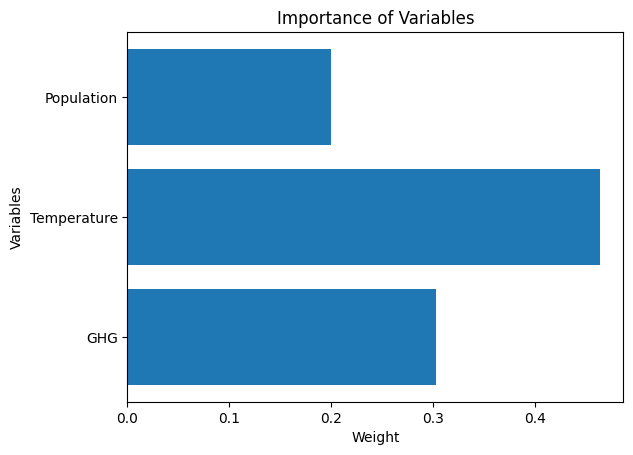

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the optimized weights
# ghg_weights_optimized = 0.3
# temperature_weights_optimized = 0.5
# population_weights_optimized = 0.2

# Create a list of variables and corresponding weights
variables = ['GHG', 'Temperature', 'Population']
weights = [ghg_weights_optimized, temperature_weights_optimized, population_weights_optimized]

# Plot the horizontal bar plot
plt.barh(variables, weights)
plt.xlabel('Weight')
plt.ylabel('Variables')
plt.title('Importance of Variables')

# Display the plot
plt.show()
